# Admission Prediction Problem

## Importing Modules

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score

## Loading Dataset

In [91]:
admissions=pd.read_csv("F:/dataquest dataset/addmissions11.csv")

In [92]:
admissions.head(5)

,admit,gre,gpa,ranking
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [93]:
pd.crosstab(admissions['ranking'],admissions['admit'],margins=True)


admit,0,1,All
ranking,,,
1.0,28,33,61
2.0,97,53,150
3.0,93,28,121
4.0,55,12,67
All,273,126,399


### Percentage of students admitted based on rankings

In [94]:
ct=pd.crosstab(admissions['ranking'],admissions['admit'],margins=True)
def perconverter(row):
    return row[1]/row[2]
admissions_ranking=ct.apply(perconverter,axis=1)
admissions_ranking

ranking
1.0    0.540984
2.0    0.353333
3.0    0.231405
4.0    0.179104
All    0.315789
dtype: float64

In [95]:
rank_4_admitted=admissions[(admissions['ranking']==4)&(admissions['admit']==1)]
rank_4_admitted

,admit,gre,gpa,ranking
3,1,640.0,3.19,4.0
27,1,520.0,3.74,4.0
141,1,700.0,3.52,4.0
155,1,580.0,2.86,4.0
197,1,400.0,3.23,4.0
253,1,540.0,3.55,4.0
254,1,740.0,3.52,4.0
278,1,680.0,3.00,4.0
287,1,660.0,3.70,4.0
313,1,520.0,3.65,4.0


In [96]:
admissions['ranking'].value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: ranking, dtype: int64

In [97]:
admissions.shape[0]

400

In [98]:
admissions.dtypes

admit        int64
gre        float64
gpa        float64
ranking    float64
dtype: object

In [99]:
admissions.isnull().sum()

admit      0
gre        2
gpa        2
ranking    1
dtype: int64

In [100]:
admissions.dropna(subset=('gre','gpa','ranking'),inplace=True)

In [101]:
admissions.isnull().sum()

admit      0
gre        0
gpa        0
ranking    0
dtype: int64

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


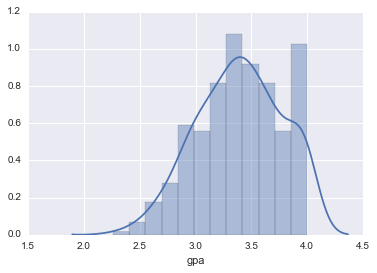

In [102]:
sns.distplot(admissions['gpa'])

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


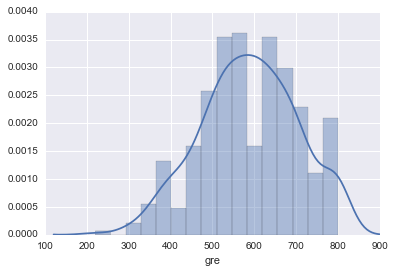

In [103]:
sns.distplot(admissions['gre'])

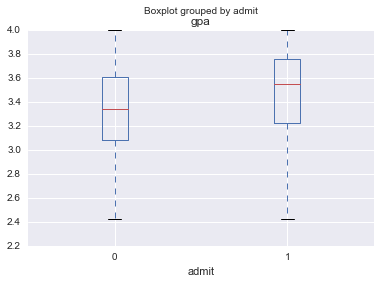

In [104]:
admissions.boxplot('gpa',by='admit')

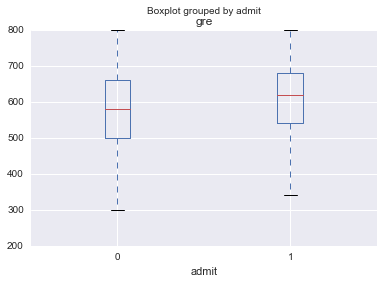

In [105]:
admissions.boxplot('gre',by='admit')

In [106]:
model=LogisticRegression()
model.fit(admissions[['gre','gpa','ranking']],admissions['admit'])
predictions=model.predict(admissions[['gre','gpa','ranking']])
prob=model.predict_proba(admissions[['gre','gpa','ranking']])
print(prob[0:10])
print(predictions[0:10])
admissions['predicted_labels']=predictions
print(admissions['predicted_labels'].value_counts())
admissions['admit'].value_counts()

[[ 0.81281159  0.18718841]
 [ 0.71674538  0.28325462]
 [ 0.35335035  0.64664965]
 [ 0.84171051  0.15828949]
 [ 0.87596269  0.12403731]
 [ 0.57248149  0.42751851]
 [ 0.51867324  0.48132676]
 [ 0.72135696  0.27864304]
 [ 0.77145926  0.22854074]
 [ 0.54970135  0.45029865]]
[0 0 1 0 0 0 0 0 0 0]
0    354
1     43
Name: predicted_labels, dtype: int64


0    271
1    126
Name: admit, dtype: int64

In [107]:
f1=f1_score(admissions['predicted_labels'],admissions['admit'])
f1

0.3313609467455621

## The Model is not a good fit

In [108]:
matches=admissions['admit']==admissions['predicted_labels']
correct_predictions=admissions[matches]
accuracy=len(correct_predictions)/admissions.shape[0]
accuracy

0.7153652392947103

In [109]:
true_positive_filter = (admissions["predicted_labels"] == 1) & (admissions["admit"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = (admissions["predicted_labels"] == 0) & (admissions["admit"] == 1)

false_negatives = len(admissions[false_negative_filter])
sensitivity = true_positives / (true_positives + false_negatives)
sensitivity


0.2222222222222222

In [110]:
true_negatives=len(admissions[(admissions["predicted_labels"] == 0) & (admissions["admit"] == 0)])
false_positive=len(admissions[(admissions["predicted_labels"] == 1) & (admissions["admit"] == 0)])
specificity=true_negatives/(true_negatives+false_positive)
specificity

0.9446494464944649

In [111]:
#admissions = admissions.drop("admit", axis=1)
kf = KFold(len(admissions), 3, shuffle=True, random_state=8)
lr = LogisticRegression()
accuracies = cross_val_score(lr,admissions[['gpa','gre','ranking']], admissions["admit"], scoring="accuracy", cv=kf)
accuracies.mean()

0.70025442393863446

In [112]:
lr.fit(admissions[['gpa','gre','ranking']],admissions['admit'])
prediction=lr.predict(admissions[['gpa','gre','ranking']])
admissions['predicted_labels']=prediction
admissions.head()

,admit,gre,gpa,ranking,predicted_labels
0,0,380.0,3.61,3.0,0
1,1,660.0,3.67,3.0,0
2,1,800.0,4.00,1.0,1
3,1,640.0,3.19,4.0,0
4,0,520.0,2.93,4.0,0


In [113]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(admissions['predicted_labels'],admissions['admit'])
accuracy

0.7153652392947103

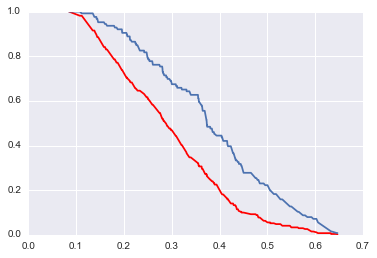

In [114]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(admissions["admit"], prob[:,1])
plt.plot(thresholds,fpr,c='r')
plt.plot(thresholds,tpr)
plt.show()

In [115]:
auc_score = metrics.roc_auc_score(admissions["admit"], prob[:,1])
auc_score

0.68048966203947758

### Improvoing Models Efficiancy

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

In [64]:
clf=GradientBoostingClassifier()
para={'max_depth':[2,4,5,7,8,10,15,20]}
clf_grid=GridSearchCV(clf,para,cv=5,scoring='f1')
clf_grid.fit(admissions[['gpa','gre','ranking']],admissions['admit'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 5, 7, 8, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [65]:
clf_grid.best_params_

{'max_depth': 10}

In [71]:
predictions=clf_grid.predict(admissions[['gpa','gre','ranking']])
prob=clf_grid.predict_proba(admissions[['gpa','gre','ranking']])
admissions['predicted_labels']=predictions

In [67]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(admissions['predicted_labels'],admissions['admit'])
accuracy

0.99244332493702769

In [68]:
f1=f1_score(admissions['predicted_labels'],admissions['admit'])
f1

0.98804780876494014

In [69]:
admissions.head(20)

,admit,gre,gpa,ranking,predicted_labels
0,0,380.0,3.61,3.0,0
1,1,660.0,3.67,3.0,1
2,1,800.0,4.00,1.0,1
3,1,640.0,3.19,4.0,1
4,0,520.0,2.93,4.0,0
5,1,760.0,3.00,2.0,1
6,1,560.0,2.98,1.0,1
7,0,400.0,3.08,2.0,0
8,1,540.0,3.39,3.0,1
9,0,700.0,3.92,2.0,0


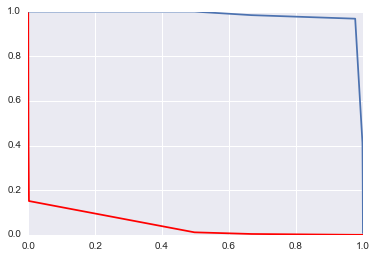

In [72]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(admissions["admit"], prob[:,1])
plt.plot(thresholds,fpr,c='r')
plt.plot(thresholds,tpr)
plt.show()

In [73]:
auc_score = metrics.roc_auc_score(admissions["admit"], prob[:,1])
auc_score

0.9998535699642711

In [116]:
from sklearn.cross_validation import train_test_split

In [117]:
trainx,testx,trainy,testy=train_test_split(admissions[['gpa','gre','ranking']],admissions['admit'],test_size=0.20,stratify=admissions['admit'],random_state=42)

In [118]:
clf=GradientBoostingClassifier(max_depth=10)
clf.fit(trainx,trainy)
predictions=clf_grid.predict(testx)
prob=clf_grid.predict_proba(testx)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predictions,testy)
accuracy


0.98750000000000004

In [119]:
f1=f1_score(predictions,testy)
f1

0.97959183673469385

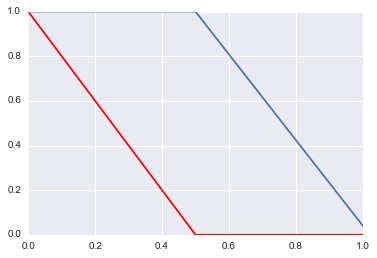

In [120]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, prob[:,1])
plt.plot(thresholds,fpr,c='r')
plt.plot(thresholds,tpr)
plt.show()

#### This is the best case scenario
#### Fpr is 0 whith threshhold=0.5
#### Tpr is 1 with  threshhold =0.5

In [121]:
auc_score = metrics.roc_auc_score(testy, prob[:,1])
auc_score

1.0

In [123]:
testy[:10]

243    0
211    0
86     0
76     0
312    0
318    1
276    0
142    0
36     0
182    0
Name: admit, dtype: int64

In [124]:
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)